# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [9]:
# Extract all rows of data
table = soup.find('table', class_ = 'table')
data = table.find_all('tr', class_ = 'data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Create an empty list
mars_rows = []

# Loop through the scraped data to create a list of rows
for row in data:
    id = row.find_all('td')[0].text
    terrestrial_date = row.find_all('td')[1].text
    sol = row.find_all('td')[2].text
    ls = row.find_all('td')[3].text
    month = row.find_all('td')[4].text
    min_temp = row.find_all('td')[5].text
    pressure = row.find_all('td')[6].text
    mars_rows.append({
        'id': id,
        'terrestrial_date': terrestrial_date,
        'sol': sol,
        'ls': ls,
        'month': month,
        'min_temp': min_temp,
        'pressure': pressure
    })

In [13]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_df = pd.DataFrame(mars_rows, columns = mars_columns)

In [15]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [17]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [19]:
# Change data types for data analysis
import datetime
mars_df['id'] = mars_df['id'].astype('int32')
mars_df['ls'] = mars_df['ls'].astype('int32')
mars_df['month'] = mars_df['month'].astype('int32')
mars_df['min_temp'] = mars_df['min_temp'].astype('float64')
mars_df['pressure'] = mars_df['pressure'].astype('float64')
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'], format = '%Y-%m-%d')

In [21]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                         object
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [23]:
# 1. How many months are there on Mars?
mars_df['month'].max()

12

In [25]:
# 2. How many sols (Martian days) worth of data are there?
mars_df['sol'].count()

1867

In [27]:
# 3. What is the average minimum temperature by month?
min_temp_by_month = mars_df.groupby(['month'])['min_temp'].mean().reset_index()
min_temp_by_month

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


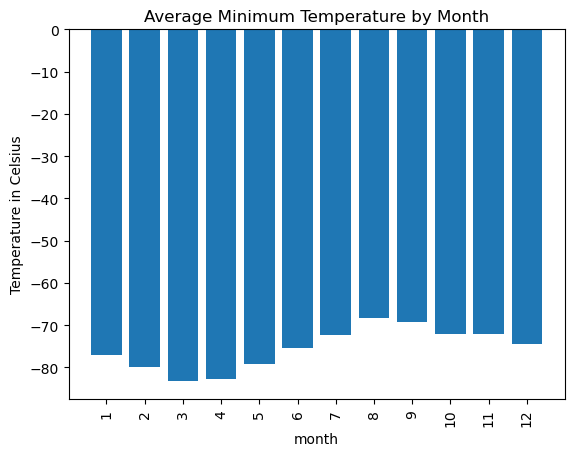

In [29]:
# Plot the average minimum temperature by month
plt.bar(min_temp_by_month['month'], min_temp_by_month['min_temp'])
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Month')
plt.xticks(min_temp_by_month['month'], rotation = 90)
plt.show()

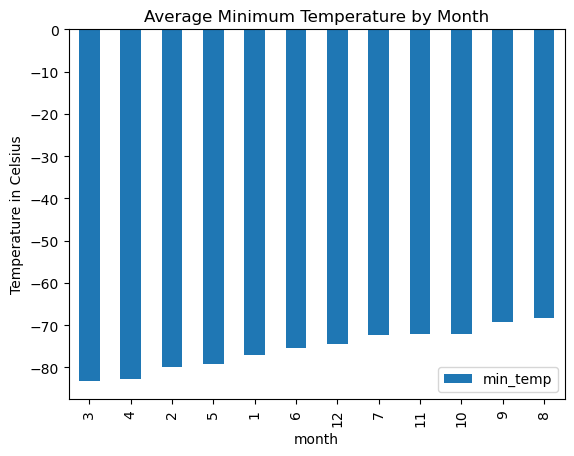

In [31]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_min_temp_by_month = min_temp_by_month.sort_values(by = ['min_temp']).reset_index()
sorted_min_temp_by_month.plot(x = 'month', y = 'min_temp', kind = 'bar')
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Month')
plt.xticks(rotation = 90)
plt.show()

In [33]:
# 4. What is the average pressure by month?
average_pressure_by_month = mars_df.groupby(['month'])['pressure'].mean().reset_index()
average_pressure_by_month

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


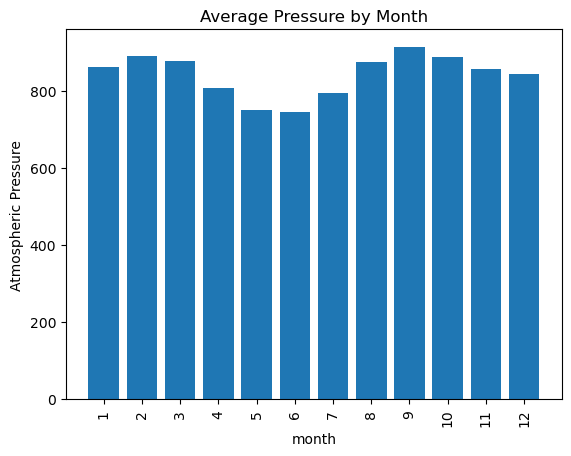

In [35]:
# Plot the average pressure by month
plt.bar(average_pressure_by_month['month'], average_pressure_by_month['pressure'])
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Month')
plt.xticks(average_pressure_by_month['month'], rotation = 90)
plt.show()

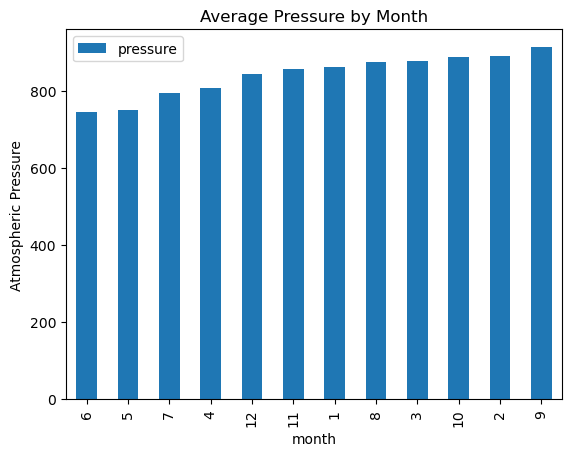

In [37]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_average_pressure_by_month = average_pressure_by_month.sort_values(by = ['pressure']).reset_index()
sorted_average_pressure_by_month.plot(x = 'month', y = 'pressure', kind = 'bar')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Month')
plt.xticks(rotation = 90)
plt.show()

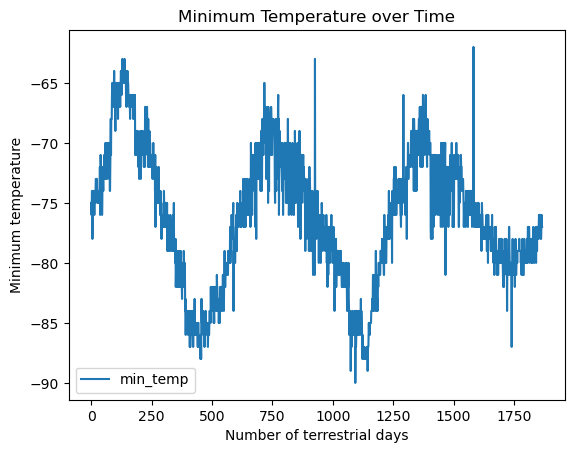

In [39]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
min_temp_by_date = mars_df[['terrestrial_date', 'min_temp']].copy()
min_temp_by_date.plot(y = 'min_temp', use_index = True)
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.title('Minimum Temperature over Time')
plt.show()

#### Minimum Temperature

The minimum temperate in terms of month occurs in month 3 in one year on Mars and is approximately -83 degrees Celsius. Additionally, months 1-6 are the coolest months on Mars over the period of data taken. This half of the year is likely the coolest half of the year in this location on Mars.

#### Atmospheric Pressure

The average atmospheric pressure runs similar to a sine or cosine function over the months of a year on Mars. The month with the lowest average atmospheric pressure is month 6 and is approximately 745 mm Hg. The month with the highest average atmospheric pressure is month 9 and is approximately 913 mm Hg. There appears to be a pattern of wave in terms of average atmospheric pressure by month in a year on Mars.

#### Year Length

The lengh of year on Mars appears to be the equivalent to approximately 630 days on Earth. Comparing where all the lowest relative minimum temperatures occur and where all the highest relative minimum temperatures occur gives some insight as what a year may be due to the period of time it takes to return to such a level. There are such relative minima approximately at days 470 and 1090. There are such relative maxima at days 120, 750, and 1380. This gives a good estimate from only this data that a year on Mars falls close to length of 630 days on Earth.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [41]:
# Write the data to a CSV
mars_df.to_csv('mars_data.csv', index = False)

In [43]:
browser.quit()